In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
print(os.getcwd())

C:\Users\HP


In [2]:
print(tf.__version__)

2.1.0


In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),include_top = False, 
                                weights = None )
                                
weight_path= "C:\\Users\\HP\\inception_v3_weights_tf_dim_ordering_tf_kernels.h5"
pre_trained_model.load_weights(weight_path,by_name=True)

for layer in pre_trained_model.layers:
    layer.trainable=False
    
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [6]:
last_layer= pre_trained_model.get_layer("mixed7")
print(last_layer.output_shape)
last_output = last_layer.output

(None, 7, 7, 768)


In [7]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(1, activation='sigmoid')(x)          

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics =['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
______________________________________________________________________________________________

In [8]:
train_dir ="C:\\Users\\HP\\train"
val_dir = "C:\\Users\\HP\\val"

train_horse_dir = os.path.join(train_dir,"horses")
train_human_dir = os.path.join(train_dir,"humans")
val_human_dir = os.path.join(val_dir,"humans")
val_horse_dir = os.path.join(val_dir,"horses")


print(len(os.listdir(train_horse_dir)))
print(len(os.listdir(train_human_dir)))
print(len(os.listdir(val_human_dir)))
print(len(os.listdir(val_horse_dir)))

500
527
128
128


In [9]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range = 40,
                                 width_shift_range = 0.2,
                                 height_shift_range =0.2,
                                 shear_range = 20 ,
                                 horizontal_flip =True ,
                                 zoom_range = 0.2 )
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=10,
                                                  target_size=(150,150),
                                                  class_mode= "binary")
val_datagen = ImageDataGenerator(rescale=1.0/255)

val_generator=val_datagen.flow_from_directory(val_dir,
                                              batch_size=10,
                                              target_size=(150,150),
                                              class_mode="binary")

                                                  

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached 97.0% accuracy!")
      self.model.stop_training = True


In [11]:
callbacks = myCallback()
history = model.fit(train_generator,
                             validation_data = val_generator,
                              epochs = 5,
                              verbose = 1,
                              callbacks=[callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 103 steps, validate for 26 steps
Epoch 1/5
103/103 [==============================] - 18s 170ms/step - loss: 1.6332 - acc: 0.5852 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/5
103/103 [==============================] - 12s 116ms/step - loss: 0.7613 - acc: 0.6933 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/5
103/103 [==============================] - 12s 115ms/step - loss: 0.5990 - acc: 0.7254 - val_loss: 0.6930 - val_acc: 0.5938
Epoch 4/5
103/103 [==============================] - 12s 116ms/step - loss: 0.5705 - acc: 0.7459 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 5/5
103/103 [==============================] - 12s 117ms/step - loss: 0.5228 - acc: 0.7663 - val_loss: 0.6931 - val_acc: 0.5000


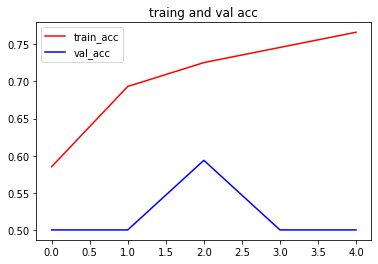

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

acc=history.history['acc']
loss=history.history['loss']
val_acc= history.history["val_acc"]
val_loss=history.history["val_loss"]

epochs=range(len(acc))
plt.plot(epochs,acc,"r", label="train_acc")
plt.plot(epochs,val_acc,"b", label="val_acc")
plt.title("traing and val acc")
plt.legend(loc=0)
plt.figure()
plt.show()